This notebook shows the procedure of using trained model for realtime data.

> Note: Due to ITC and network restrictions, we won't be using actual "realtime" data. Instead, we'll create some pseudo realtime data and use it for demo. This notebook is by no means a complete guide on realtime analytics, but only a simple demo showing the basic processes.

Basically, the process has the following steps:

1. Get the offline data for training machine learning models;
2. Train model;
3. Periodically fetch latest data;
4. Run prediction;
5. Present prediction result.

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
import datetime

## Load the offline data for training

First, load the whole data set. Remove unnecessary column:

In [3]:
df = pd.read_csv('Iris-data.csv')
df.drop('id', axis=1, inplace=True)
df.head()

,a1,a2,a3,a4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Then create the data for training. We leave out 10 data points for creating the pseudo realtime data.

In [4]:
X = df.values[:, :4]
y = df.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10)

## Train ML model

In [5]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Periodically fetch data, apply model, present result

We'll create a pseudo database to store the "latest" data. It is a simple 2-dimensional table, with time as the index and feature values as the content. The database is assumed to be self-updating every one minute with the latest data.

In [6]:
database = pd.DataFrame(X_test[:, :], index=pd.date_range(time.strftime('%Y-%m-%d %H:%M'), periods=10, freq='1min'))
database.index = [x.strftime('%Y-%m-%d %H:%M') for x in database.index]
database.head()

,0,1,2,3
2018-09-19 15:08,6.6,3,4.4,1.4
2018-09-19 15:09,5.1,3.5,1.4,0.2
2018-09-19 15:10,5.4,3,4.5,1.5
2018-09-19 15:11,7.7,2.6,6.9,2.3
2018-09-19 15:12,6.7,3,5.2,2.3


What we want to achieve is every minute, retrieve the latest data, and apply our previously trained model to the data.

Prediction for data at 2018-09-19 15:08 is ['Iris-versicolor']


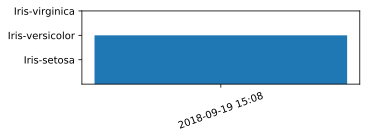

Prediction for data at 2018-09-19 15:09 is ['Iris-setosa']


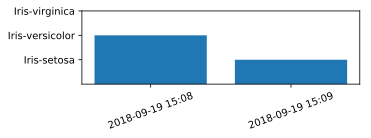

Prediction for data at 2018-09-19 15:10 is ['Iris-versicolor']


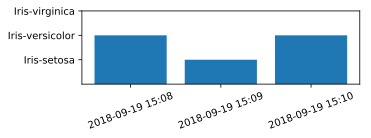

Prediction for data at 2018-09-19 15:11 is ['Iris-virginica']


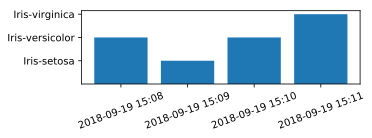

Prediction for data at 2018-09-19 15:12 is ['Iris-virginica']


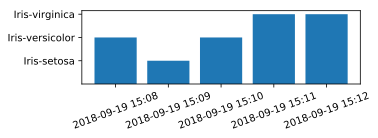

Prediction for data at 2018-09-19 15:13 is ['Iris-setosa']


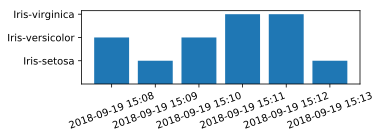

Prediction for data at 2018-09-19 15:14 is ['Iris-virginica']


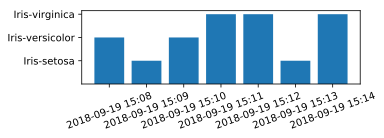

Prediction for data at 2018-09-19 15:15 is ['Iris-virginica']


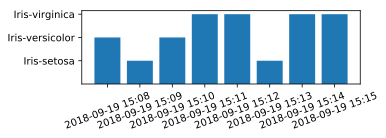

Prediction for data at 2018-09-19 15:16 is ['Iris-virginica']


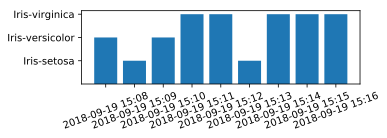

Prediction for data at 2018-09-19 15:17 is ['Iris-virginica']


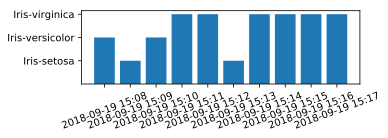

Cannot retrieve latest data. Going to quit.


In [7]:
ticks = []
preds = []
pred_dict = dict(zip(df.label.unique(), range(1, 1+len(df.label.unique()))))

while True:
    try:
        now = time.strftime('%Y-%m-%d %H:%M')
        latest_data = database.loc[now, :]
        
        pred = clf.predict(latest_data.values.reshape(1, -1))
        
        print('Prediction for data at {} is {}'.format(now, pred))        
        ticks.append(now)
        preds.append(pred_dict[pred[0]])
        fig, ax = plt.subplots(figsize=(5, 1.5))
        ax.bar(ticks.copy(), preds.copy())
        plt.yticks(range(1, 1+len(df.label.unique())), list(df.label.unique()))
        fig.autofmt_xdate(rotation=20, ha='center')
        plt.show()
        
        time.sleep(60)
    except KeyError:
        print('Cannot retrieve latest data. Going to quit.')
        break    

* Line 7-8 retrieves the latest data from database. Here for demo purpose, we're getting data from a dataframe.
* Line 10 runs the prediction on the latest data.
* Line 12-19 is used to present the prediction (classification) result.
* Line 21 specifies the frequency of this realtime operation.